# import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Datasets/all_tickets.csv')
data.head()


Mounted at /content/drive


,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [3]:
data.sample(3).T

,32292,30828,4041
title,project setup pas,architect service,access
body,wednesday pm code hi please code client setup ...,friday architect hello executing please deploy...,hi please give br tester
ticket_type,1,1,1
category,4,6,4
sub_category1,3,22,1
sub_category2,7,0,7
business_service,72,63,19
urgency,3,3,3
impact,4,4,4


In [4]:
data.ticket_type.value_counts()

1    34621
0    13928
Name: ticket_type, dtype: int64

In [5]:
data.columns

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')

In [6]:
for cols in data.columns:
  print(cols,':' )
  print(data[cols].value_counts())
  print('\n\n\n')


title :
new purchase po                                   1138
new starter                                        546
access                                             524
access to                                          477
po                                                 182
                                                  ... 
assign visual studio licenses for team               1
receive any information on server and location       1
replace old laptop with new one                      1
belgrade new address internal systems                1
running out on extensions                            1
Name: title, Length: 30118, dtype: int64




body :
hi since recruiter lead permission approve requisitions makes please make thanks recruiter                                                                                                                                                                                                                                                     

we can see ticket type is of binary ie either type1 or type 2
we can use classification problem to identify the type of ticket based on other features.
binary text classification model 

Firstly, we will need to preprocess our text to convert it to a numeric form. As ml models cannot use text,so the first step is to use a text preprocesing technique called count vectorization

CountVectorizer takes our text and returns a count for each time a word present in the entire “corpus”

CountVectorizer, we’ll instantiate it, then use fit_transform() to pass it the text and return a Bag of Words model

We’ll then use Numpy to convert that Bag of Words to a dense array that can better be used by the mode

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


# Representing Text as Numerical Data

## Dividing data into Dependent and Independent Values

In [8]:
X = data['body']
y = data['ticket_type']

In [9]:
# check the shapes of X and y
print('X dimensionality', X.shape)
print('y dimensionality', y.shape)

X dimensionality (48549,)
y dimensionality (48549,)


## Test and Train Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y)

## Feature Extraction : Count Vectorizer

### Fit and Transform : Training data

In [11]:
print("Extracting features from the training data")
# Create a Vectorizer Object
count_vectorizer = CountVectorizer()
#  learn the 'vocabulary' of the training data (occurs in-place) using fit
count_vectorizer.fit(X_train)
# Printing the identified Unique words along with their indices
print("Vocabulary: ", count_vectorizer.vocabulary_)


Extracting features from the training data
Vocabulary:  {'query': 7616, 'hi': 4547, 'have': 4475, 'expense': 3595, 'claim': 1643, 'ref': 7914, 'advised': 219, 'approval': 522, 'flow': 3942, 'for': 3983, 'code': 1739, 'submitted': 9508, 'against': 252, 'changed': 1534, 'since': 9005, 'possible': 7207, 'current': 2392, 'cancelled': 1376, 'put': 7586, 'back': 800, 'status': 9369, 'can': 1366, 'sub': 9490, 'again': 251, 'via': 10633, 'regards': 7968, 'infrastructure': 4963, 'consultant': 2093, 'wednesday': 10800, 'confluence': 2015, 'hello': 4519, 'guys': 4395, 'please': 7113, 'help': 4520, 'think': 9913, 'had': 4404, 'past': 6858, 'older': 6533, 'proper': 7486, 'excel': 3513, 'thanks': 9881, 'pm': 7127, 'question': 7619, 'regarding': 7966, 'public': 7539, 'addresses': 163, 'asking': 605, 'connect': 2034, 'externally': 3671, 'mine': 6038, 'sitting': 9023, 'next': 6343, 'has': 4464, 'include': 4854, 'other': 6651, 'offices': 6521, 'senior': 8794, 'developer': 2720, 'thursday': 9956, 'dear':

In [12]:
# Encode the Document
# transform training data into a 'document-term matrix'
X_train_cv = count_vectorizer.transform(X_train)
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(X_train_cv.toarray())

Encoded Document is:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
# fit_transform together
X_train_cv = count_vectorizer.fit_transform(X_train)
print("n_samples: %d, n_features: %d" % X_train_cv.shape)

n_samples: 33984, n_features: 11036


In [14]:
X_train_cv = np.array(X_train_cv.todense())
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
# examine the vocabulary and document-term matrix together
# pd.DataFrame(matrix, columns=columns)
pd.DataFrame(X_train_cv, columns=count_vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,abandon,abandoned,abbreviations,abc,abilities,ability,able,abnormal,abnormally,...,zion,zip,zipped,zipper,zipping,zn,zone,zones,zoom,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Transform : Test data

In [16]:
X_test_cv = count_vectorizer.transform(X_test)

# Building and Evaluating the model


In order to make a prediction, the new observation must have the same features as the training observations, both in number and meaning.

In [17]:
# 1.instantiate a Multinomial Naive Bayes model
model = MultinomialNB()
# 2.train the model 
# using X_train_cv(timing it)
%time model.fit(X_train_cv, y_train)

CPU times: user 4.73 s, sys: 0 ns, total: 4.73 s
Wall time: 4.75 s


MultinomialNB()

In [18]:
# 3. make class predictions for X_test
# transform x_test and use it to predict Y
y_pred = model.predict(X_test_cv)

In [19]:
y_train= np.array(y_train)

### Test and Tarin Score

In [20]:
print('Train Score:', model.score(X_train_cv, y_train))

Train Score: 0.9937029190207156


In [21]:
print('Test Score:', model.score(X_test_cv, y_test))

Test Score: 0.993271541366289


### Performance Measures:

In [22]:
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred, average="macro"))
print('Confusion Matrix :', metrics.confusion_matrix(y_test, y_pred))

Test Accuracy: 0.993271541366289
F1 score: 0.9917994568982254
Confusion Matrix : [[ 4148    30]
 [   68 10319]]


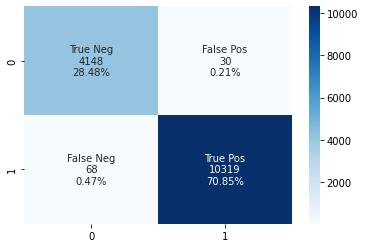

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels, fmt='', cmap='Blues')

In [24]:
print(metrics.classification_report(y_test, y_pred, target_names=["Calss 0", "Class 1"]))

              precision    recall  f1-score   support

     Calss 0       0.98      0.99      0.99      4178
     Class 1       1.00      0.99      1.00     10387

    accuracy                           0.99     14565
   macro avg       0.99      0.99      0.99     14565
weighted avg       0.99      0.99      0.99     14565

